In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', 
                 header=None, sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD',
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

X = df[['RM']].values
X.shape
y = df['MEDV'].values
y.shape

(506,)

Coefficients: 
 [9.31132806]
root mean squared error: 6.86
Variance score: 0.44


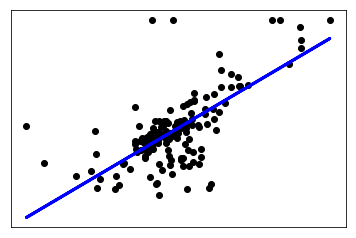

In [5]:
# 훈련 데이터와 테스트 데이터로 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 훈련데이터로 학습시키기
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

# 테스트 데이터로 결과값 예측
y_pred = regr.predict(X_test)

# 회귀 계수 출력
print('Coefficients: \n', regr.coef_)

# RMSE 출력
print("root mean squared error: %.2f" %sqrt(mean_squared_error(y_test, y_pred)))

# r-score 출력
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()


In [3]:
# 다항 회귀모델 학습하기
X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

mlr = linear_model.LinearRegression()
mlr.fit(X_train, y_train)
y_pred = mlr.predict(X_test)

print('Coefficients: \n', regr.coef_)
print("root mean squared error: %.2f"% sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))


Coefficients: 
 [9.31132806]
root mean squared error: 5.21
Variance score: 0.67


In [4]:
# 데이터 스케일링 : 표준화 (결과는 동일, linear_model 안에 자체구현 되어있기 때문)
from sklearn.preprocessing import StandardScaler
y = df[['MEDV']].values

sc_x = StandardScaler()
X_std = sc_x.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=0)

mlr = linear_model.LinearRegression()
mlr.fit(X_train, y_train)
y_pred = mlr.predict(X_test)

print('Coefficients: \n', mlr.coef_)
print("root mean squared error: %.2f"% sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [[-1.04242529  1.03604084  0.0777311   0.63721104 -1.8789804   2.70876672
  -0.28079317 -3.1560096   2.10632153 -1.86413286 -2.20120069  0.62151065
  -3.47239016]]
root mean squared error: 5.21
Variance score: 0.67


In [6]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

print(dataset.shape)
print(dataset.head(20))
print(dataset.describe())
print(dataset.groupby('class').size())

X = dataset.iloc[:, :-1].values
y = dataset['class'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

(150, 5)
    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13         

In [7]:
# 로지스틱 분류기 학습
from sklearn.linear_model import LogisticRegression
lrm = LogisticRegression()
lrm.fit(X_train, y_train)

lrm.score(X_test, y_test)

0.8888888888888888

In [12]:
# Decision Tree 분류기 학습
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.9777777777777777

In [13]:
# Decision Tree 시각화 (필요한 모듈 설치시에만 보임)
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(clf, out_file=None, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [10]:
# knn 분류기 학습 : 최근접 이웃을 찾아가는 분류 알고리즘. 지도학습의 일종.
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors=3)
clf = clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.9777777777777777